<a href="https://colab.research.google.com/github/JuliaLorenzetti/data-science/blob/main/CodingTask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Fundamentals for DCBP, S. Haug, University of Bern 

# Coding Task 1

- Deadline (upload to Ilias): 2022-03-20 24:00
- Estimated effort: 2-5 hours
- Data on Ilias (4ms_...) with metadata file CCD-Metadata


## Tasks (maximum 12.5 points)

- Write a method (function) which removes the header information in the datafile and saves that information into a separate textfile. [0.5 points] 
- Write a function which reduces the data resolution by averaging over 1, 2, 3 and 4 nm wavelengths. Save these 4 new reduced datasets in new files. Do this (1) by writing an explicit loop and (2) by using pandas methods. Measure the running times of the two approaches. [6 points]
- Write a function which takes two wavelengths as input and plots the difference of the data at these lengths over time. [2 points] 
- Let the x-axis be in seconds, label the axes with names and units, label the plot with color and legend, make a title for the plot. Save the plot to a file. [2 points]
- Plot the full and the reduced datasets in the same figure. Is there any visual difference? [2 points]

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

Saving data without header information in a separate file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Data Science/CCD-absorbance.txt'

def remove_header():
  df = pd.read_csv(path, delimiter='\t', header=13) # the data is tab separated, thus delimiter \t
  df.info()
  df.to_string('CCD-data.txt')
remove_header()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Columns: 3650 entries, Unnamed: 0 to 780.0381
dtypes: float64(3648), int64(1), object(1)
memory usage: 9.9+ MB


Reducing the data resolution and measuring the running time

In [ ]:
%%timeit -n 10 -r 5
df = pd.read_csv(path, delimiter='\t', header=13)
df_array= np.array(df)
mean_values_array= np.empty((355, 406), float)
for i in range(2, 3650, 9):  # data spans a range of 464 nm in 3658 columns which makes for roughly 8 columns per 1 nm
    df_subarray= df_array[0:355, i:(i+8)]
    new_df_subarray= df_subarray.mean(axis=1)
    np.insert(mean_values_array, i, new_df_subarray)
pd.DataFrame(mean_values_array).to_csv('mean-1nm.csv')


10 loops, best of 5: 914 ms per loop


In [ ]:
df = pd.read_csv(path, delimiter='\t', header=13)
df_array= np.array(df)
mean_values_array= np.empty((355, 406), float)
for i in range(2, 3650, 33):
    df_subarray= df_array[0:355, i:(i+32)]
    new_df_subarray= df_subarray.mean(axis=1)
    np.insert(mean_values_array, i, new_df_subarray)
pd.DataFrame(mean_values_array).to_csv('mean-4nm.csv')

CCD data vs time plot

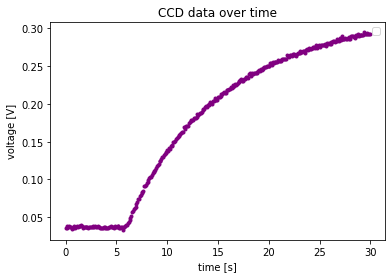

In [ ]:
df = pd.read_csv(path, delimiter='\t', header=13)
time = df.iloc[:, 1]/1000
time_corr = time - 1540456324.789
diff_nm= -(df.iloc[:,1935]-df.iloc[:, 1778])  # difference btw 570 and 550 nm 

fig, ax = plot.subplots()
ax.set_title('CCD data over time')
ax.set_ylabel('voltage [V]')
ax.set_xlabel('time [s]')
ax.plot(time_corr, diff_nm, '.', color='purple')
plot.savefig('CCD-plot1.jpg')

In [ ]:
# Reducing the data resolution does not seem to work
df_red = pd.read_csv('mean-4nm.csv', delimiter='\t')
df_red.info()
df_red.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

,",0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405"
0,"0,4.6544514573199e-310,4.6544514573212e-310,4...."
1,"1,4.6544514574754e-310,4.6544514574758e-310,4...."
2,"2,4.6544514576541e-310,4.65445145765456e-310,4..."
3,"3,4.65445145783984e-310,4.65445145784033e-310,..."
4,"4,4.65445145802615e-310,4.6544514580266e-310,4..."


Full and reduced datasets in the same plot

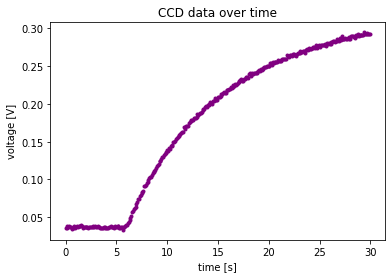

In [ ]:
df = pd.read_csv(path, delimiter='\t', header=13)
df_red = pd.read_csv('mean-4nm.csv', delimiter='\t')
time = df.iloc[:, 1]/1000
time_corr = time - 1540456324.789
diff_nm= -(df.iloc[:,1935]-df.iloc[:, 1778])  # difference btw 570 and 550 nm 
# diff_nm_red = -(df.iloc[:,65]-df.iloc[:, 60])

fig, ax = plot.subplots()
ax.set_title('CCD data over time')
ax.set_xlabel('time [s]')
ax.set_ylabel('voltage [V]')  # I believe CCD detectors give voltages as output, but I'm not sure
ax.plot(time_corr, diff_nm, '.', color='purple')
# ax.plot(time_corr, diff_nm_red, '.', color='blue')
plot.savefig('CCD-plot2.jpg')